In [386]:
import pandas as pd
import os
import numpy as np
import pickle
from datetime import datetime, time
import matplotlib.pyplot as plt
from inspect import signature

In [363]:
os.chdir(r"C:\Users\shantanu.sharma\Desktop\HC")

In [409]:
df=pd.read_csv(r"C:\Users\shantanu.sharma\Desktop\HC\Data Files\hm_features_dv_new_customers.csv")

In [365]:
df.head()

,first_txn_date_lazypay,dv,filter,is_repaid,total_count_12month,total_amount_12month,sale_count_12month,sale_amount_12month,total_count_6month,total_amount_6month,...,dc_sale_per,ecommerce_ratio_180,acc_30_180_amount,acc_90_360_amount,acc_180_360_count,acc_180_360_amount,acc_30_90_amount_cc,acc_90_180_amount_cc,acc_180_360_amount_cc,scoring_date
0,07-03-2019,0,1,N,3,2704.08,1,1352.04,3,2704.08,...,0.333333,0.500000,0.0,1.000000,1.0,1.0,-10.0,-10.0,-10.0,31-12-2019
1,07-03-2019,1,1,N,1,150.00,1,150.00,0,0.00,...,-10.000000,-10.000000,-10.0,0.000000,0.0,0.0,-10.0,-10.0,-10.0,31-12-2019
2,07-03-2019,0,1,N,1,25.00,1,25.00,1,25.00,...,1.000000,0.000000,0.0,0.000000,1.0,1.0,-10.0,-10.0,-10.0,31-12-2019
3,07-03-2019,0,1,N,2,277.00,1,78.00,2,277.00,...,0.500000,0.281588,0.0,0.281588,1.0,1.0,-10.0,-10.0,-10.0,31-12-2019
4,07-03-2019,1,1,N,1,1.00,0,0.00,0,0.00,...,-10.000000,-10.000000,-10.0,0.000000,0.0,0.0,-10.0,-10.0,-10.0,31-12-2019


In [366]:
df.describe().transpose().to_csv("describe_raw_data.csv")

In [367]:
pd.DataFrame(df.dtypes).to_csv("datatypes.csv")

In [368]:
for x in df.columns:
    print(df[x].value_counts())


06-04-2019    1065
17-03-2019     978
10-03-2019     958
07-04-2019     956
07-03-2019     876
              ... 
30-04-2019     585
20-04-2019     581
27-04-2019     570
25-04-2019     499
21-03-2019     184
Name: first_txn_date_lazypay, Length: 75, dtype: int64
0    51784
1     2580
Name: dv, dtype: int64
1    54364
Name: filter, dtype: int64
N    54364
Name: is_repaid, dtype: int64
1      13962
0      10372
2       8835
3       4887
4       3587
       ...  
103        1
295        1
327        1
359        1
255        1
Name: total_count_12month, Length: 207, dtype: int64
0.00       10372
100.00      1000
200.00       722
1.00         577
9.00         387
           ...  
7211.14        1
6078.08        1
2751.20        1
5541.00        1
378.40         1
Name: total_amount_12month, Length: 18809, dtype: int64
0      32035
1      14225
2       3885
3       1502
4        845
       ...  
74         1
42         1
105        1
136        1
127        1
Name: sale_count_12month, Leng

0      38205
1       7305
2       3404
3       1695
4       1031
       ...  
81         1
113        1
82         1
338        1
590        1
Name: failed_count_90, Length: 99, dtype: int64
0.00        38220
100.00        268
35.00         154
399.00        154
199.00        150
            ...  
6483.00         1
15883.00        1
1998.82         1
7259.00         1
13835.69        1
Name: failed_amount_90, Length: 7124, dtype: int64
0       28667
1       10527
2        5215
3        2816
4        1783
        ...  
85          1
1095        1
135         1
118         1
159         1
Name: failed_count_180, Length: 142, dtype: int64
0.00        28691
100.00        568
199.00        235
200.00        229
399.00        214
            ...  
17131.98        1
5881.69         1
13564.00        1
6033.40         1
5800.00         1
Name: failed_amount_180, Length: 10932, dtype: int64
0      16605
1      13509
2       7388
3       4257
4       2865
       ...  
594        1
105        1
3

0    54313
1       33
2       13
3        4
4        1
Name: apple_count_360, dtype: int64
0.00        54313
349.00          4
199.00          3
49.00           2
119.00          2
149.00          2
23.00           2
10.00           2
956.00          1
2142.00         1
15729.00        1
2120.00         1
593.00          1
696.00          1
729.00          1
2712.00         1
357.00          1
65.00           1
4669.00         1
1166.00         1
449.00          1
2563.00         1
169.00          1
603.00          1
1296.00         1
92.00           1
476.72          1
565.00          1
3539.00         1
942.00          1
1400.00         1
499.00          1
399.00          1
110.00          1
558.00          1
618.00          1
998.00          1
498.00          1
398.00          1
1212.00         1
1147.00         1
1533.00         1
Name: apple_amount_360, dtype: int64
0.000000    54334
1.000000       16
0.500000        6
0.333333        2
0.181818        1
0.090909        1
0.400000

0.000000    48828
1.000000     1554
0.500000      990
0.333333      475
0.250000      318
            ...  
0.163934        1
0.465753        1
0.453552        1
0.414013        1
0.238095        1
Name: Android_count_180_ratio, Length: 352, dtype: int64
0.000000    48828
1.000000     1554
0.500000      467
0.333333       47
0.666667       33
            ...  
0.975610        1
0.031131        1
0.154135        1
0.129032        1
0.070261        1
Name: Android_amount_180_ratio, Length: 3333, dtype: int64
0.000000    52860
1.000000      459
0.500000      201
0.333333      101
0.250000       83
            ...  
0.541667        1
0.382353        1
0.421053        1
0.950000        1
0.909091        1
Name: Android_count_360_ratio, Length: 155, dtype: int64
0.000000    52860
1.000000      459
0.500000       76
0.250000       11
0.666667        7
            ...  
0.237671        1
0.031543        1
0.013487        1
0.004737        1
0.013451        1
Name: Android_amount_360_ratio, Len

0.000000    44038
1.000000     3555
0.500000     1439
0.333333      833
0.250000      529
            ...  
0.061538        1
0.065789        1
0.282051        1
0.139831        1
0.007042        1
Name: other_os_count_180_ratio, Length: 465, dtype: int64
0.000000    44082
1.000000     3555
0.500000      412
0.333333      127
0.666667       74
            ...  
0.774093        1
0.304918        1
0.015929        1
0.189577        1
0.224573        1
Name: other_os_amount_180_ratio, Length: 5647, dtype: int64
0.000000    42179
1.000000     2526
0.500000     1631
0.333333     1102
0.250000      774
            ...  
0.071942        1
0.145161        1
0.735294        1
0.289474        1
0.088889        1
Name: other_os_count_360_ratio, Length: 609, dtype: int64
0.000000    42234
1.000000     2526
0.500000      473
0.333333      161
0.250000       89
            ...  
0.033421        1
0.635701        1
0.570889        1
0.928893        1
0.128227        1
Name: other_os_amount_360_ratio,

 0.000000     45037
-10.000000     7828
 1.000000       914
 0.500000         9
 0.891068         2
              ...  
 0.335033         1
 0.151515         1
 0.729035         1
 0.929180         1
 0.075865         1
Name: ratio_amount_ecom_in_dc_180, Length: 576, dtype: int64
-10.000000    27700
 0.000000     25165
 1.000000      1209
 0.500000        52
 0.333333        10
              ...  
 0.733333         1
 0.645161         1
 0.803556         1
 0.026263         1
 0.586626         1
Name: ratio_amount_dc_in_ecom_180, Length: 218, dtype: int64
 0.000000     41438
-10.000000    10406
 1.000000      1264
 0.500000       289
 0.333333       175
              ...  
 0.035714         1
 0.045455         1
 0.714286         1
 0.178571         1
 0.002558         1
Name: ratio_count_ecom_in_dc_360, Length: 136, dtype: int64
-10.000000    39542
 0.000000     12302
 1.000000      1937
 0.500000       220
 0.333333        72
 0.666667        60
 0.750000        33
 0.250000        3

-10     53011
 40        17
 0         15
 32        15
 51        15
        ...  
 435        1
 499        1
 531        1
 787        1
 175        1
Name: days_since_first_android_trans, Length: 479, dtype: int64
-10      24947
 176        70
 222        68
 244        63
 220        61
         ...  
 1330        1
 1312        1
 1331        1
 1301        1
 1311        1
Name: days_since_first_premium_bank_trans, Length: 1327, dtype: int64
-10      46710
 214        19
 69         18
 213        17
 84         17
         ...  
 1487        1
 1455        1
 1359        1
 1231        1
 2047        1
Name: days_since_first_ecom_trans, Length: 1680, dtype: int64
-10.000000    44696
 1.000000      4276
 0.000000         7
 0.800000         6
 0.142857         5
              ...  
 0.718069         1
 0.212428         1
 0.853516         1
 0.862467         1
 0.072281         1
Name: days_since_first_cc_to_days_since_first_txn, Length: 5279, dtype: int64
 1.000000     30347
-1

Name: amt_first_android_txn, Length: 661, dtype: int64
-10.000000    53024
 1.000000       317
 0.500000        12
 0.000000        10
 0.100000         5
              ...  
 0.001420         1
 0.494949         1
 1.581000         1
 0.817043         1
 5.330000         1
Name: amt_first_android_to_amt_first_txn, Length: 940, dtype: int64
-10.00      24947
 100.00      1272
 50.00        775
 199.00       554
 1.00         549
            ...  
 8057.92        1
 6748.61        1
 1262.65        1
 2197.00        1
 2618.00        1
Name: amt_first_premium_bank_txn, Length: 6613, dtype: int64
-10.000000    25132
 1.000000     16068
 0.000000       209
 2.000000       107
 0.500000        91
              ...  
 0.878757         1
 0.110778         1
 16.734652        1
 0.585586         1
 0.915000         1
Name: amt_first_premium_bank_to_amt_first_txn, Length: 10394, dtype: int64
-10.00      46710
 100.00       246
 500.00        94
 1000.00       91
 0.00          82
            .

 0.000000     50583
-10.000000     2431
 1.000000       833
 0.500000       253
 0.333333        47
              ...  
 0.461538         1
 0.095238         1
 0.769231         1
 0.535714         1
 0.086957         1
Name: top_merchants_txn_cc_count_180_ratio, Length: 65, dtype: int64
 0.000000     50583
-10.000000     2431
 1.000000       833
 0.500000       182
 0.666667         3
              ...  
 0.932800         1
 0.208045         1
 0.008479         1
 0.534560         1
 0.400000         1
Name: top_merchants_txn_cc_amount_180_ratio, Length: 336, dtype: int64
0     52229
1      1179
2       410
3       186
4        95
5        73
6        40
7        35
8        24
9        20
10       13
11       11
12        9
14        8
13        7
16        5
17        3
29        2
21        2
83        1
32        1
23        1
34        1
20        1
45        1
36        1
19        1
18        1
49        1
27        1
44        1
37        1
Name: top_merchants_txn_cc_count_360

1      12119
0      10549
2       8272
3       4302
4       3762
       ...  
651        1
215        1
151        1
204        1
511        1
Name: total_count_360, Length: 271, dtype: int64
0.00        10549
100.00        976
200.00        704
1.00          569
9.00          385
            ...  
6018.00         1
21770.00        1
8215.85         1
12328.40        1
378.40          1
Name: total_amount_360, Length: 19463, dtype: int64
0.00       41329
100.00       487
50.00        404
9.00         274
199.00       253
           ...  
1791.00        1
2620.09        1
757.20         1
1381.60        1
6913.00        1
Name: ecommerce_sale_360, Length: 4346, dtype: int64
0.00         52940
26.00           29
100.00          23
165.00          13
500.00          11
             ...  
116497.41        1
288.00           1
752.00           1
7999.00          1
5292.17          1
Name: merchant_category_others_sale_360, Length: 1000, dtype: int64
0.000000       10549
100.000000      1181

In [369]:
df["first_txn_date_lazypay"] = pd.to_datetime(df["first_txn_date_lazypay"], format = "%d-%m-%Y")
df["first_txn_date_lazypay"].agg(["max","min"])
df["month"]= pd.to_datetime(df["first_txn_date_lazypay"], format = "%d-%m-%Y").dt.strftime("%Y-%m")

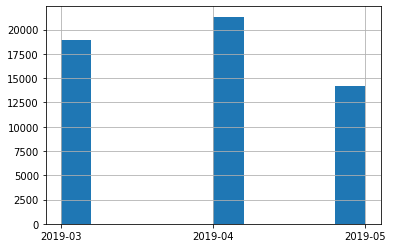

In [370]:
plt = df["first_txn_date_lazypay"].dt.strftime("%Y-%m").sort_index().hist()
plt

In [371]:
bad_rate=df[["month","dv"]].groupby("month").agg(["sum","count"])
bad_rate.columns=["_".join(x) for x in bad_rate.columns.ravel()]
bad_rate["rate"] = bad_rate["dv_sum"]/bad_rate["dv_count"]
bad_rate
#bad_rate["rate"] = bad_rate["sum"]/bad_rate["count"]

,dv_sum,dv_count,rate
month,,,
2019-03,1010,18888,0.053473
2019-04,985,21320,0.046201
2019-05,585,14156,0.041325


In [372]:
df.drop(columns = ["filter","is_repaid","scoring_date"],inplace = True)

In [373]:
df.head()

,first_txn_date_lazypay,dv,total_count_12month,total_amount_12month,sale_count_12month,sale_amount_12month,total_count_6month,total_amount_6month,sale_count_6month,sale_amount_6month,...,dc_sale_per,ecommerce_ratio_180,acc_30_180_amount,acc_90_360_amount,acc_180_360_count,acc_180_360_amount,acc_30_90_amount_cc,acc_90_180_amount_cc,acc_180_360_amount_cc,month
0,2019-03-07,0,3,2704.08,1,1352.04,3,2704.08,1,1352.04,...,0.333333,0.500000,0.0,1.000000,1.0,1.0,-10.0,-10.0,-10.0,2019-03
1,2019-03-07,1,1,150.00,1,150.00,0,0.00,0,0.00,...,-10.000000,-10.000000,-10.0,0.000000,0.0,0.0,-10.0,-10.0,-10.0,2019-03
2,2019-03-07,0,1,25.00,1,25.00,1,25.00,1,25.00,...,1.000000,0.000000,0.0,0.000000,1.0,1.0,-10.0,-10.0,-10.0,2019-03
3,2019-03-07,0,2,277.00,1,78.00,2,277.00,1,78.00,...,0.500000,0.281588,0.0,0.281588,1.0,1.0,-10.0,-10.0,-10.0,2019-03
4,2019-03-07,1,1,1.00,0,0.00,0,0.00,0,0.00,...,-10.000000,-10.000000,-10.0,0.000000,0.0,0.0,-10.0,-10.0,-10.0,2019-03


In [374]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn import metrics
import xgboost as xgb

In [375]:
def fimportances(xc, predictors):
    importances = pd.DataFrame({'predictor': predictors, 'importance': xc.feature_importances_})
    importances = importances[importances['importance'] > 0]
    importances.sort_values(by='importance', ascending=False, inplace=True)
    importances.reset_index(inplace=True, drop=True)
    importances = importances[['predictor', 'importance']]
    return importances
    

In [376]:
df.select_dtypes(exclude=["int64","float64"]).dtypes

first_txn_date_lazypay    datetime64[ns]
month                             object
dtype: object

In [377]:
df_test = df[df["first_txn_date_lazypay"]>= datetime(2019,5,1)]
df_train = df[df["first_txn_date_lazypay"]< datetime(2019,5,1)]


In [378]:
X_test = df_test.drop(columns = "dv")
X_train = df_train.drop(columns = "dv")
Y_test = df_test["dv"]
Y_train = df_train["dv"]

In [379]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.3, stratify =X_train["month"])

In [380]:
print("Event Rate Train: ", '{:,.2%}'.format(Y_train.sum()/Y_train.count()), "\t shape:", len(Y_train))
print("Event Rate Valid: ", '{:,.2%}'.format(Y_valid.sum()/Y_valid.count()), "\t shape:", len(Y_valid))
print("Event Rate Test: ", '{:,.2%}'.format(Y_test.sum()/Y_test.count()), "\t shape:", len(Y_test))



Event Rate Train:  5.06% 	 shape: 28145
Event Rate Valid:  4.74% 	 shape: 12063
Event Rate Test:  4.13% 	 shape: 14156


In [255]:
param_grid = {'max_depth': np.arange(1,6),
              'learning_rate': np.arange(0.001, 0.02, 0.001),
              'subsample': np.arange(0.4, 0.7, 0.05),
              'min_child_weight': np.arange(1, 25, 3),
              'colsample_bytree': np.arange(0.5, 0.75, 0.05),
              'scale_pos_weight' :np.arange(5, 40, 2)
            }

param_dist = {'objective': 'binary:logistic', 'nthread': -1, 'n_estimators': 200}


In [256]:
xgb_model= xgb.XGBClassifier(**param_dist)

In [281]:
kfolds = StratifiedKFold(3, random_state=1)
clf = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, scoring=['roc_auc'], n_iter=100,
                         random_state=40, cv=kfolds.split(X_train.drop(columns=['first_txn_date_lazypay','month']), Y_train), refit='roc_auc',error_score=0, return_train_score =True, verbose = 2)

In [282]:
print("Randomized search..")

search_time_start = datetime.now()
clf.fit(X_train.drop(columns=['first_txn_date_lazypay','month']), np.ravel(Y_train))
print("Randomized search time:",  datetime.now() - search_time_start)

params = clf.best_params_   
dic=clf.cv_results_ 
tmp =  pd.DataFrame(dic["params"])

Randomized search..
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002, total=  24.9s
[CV] subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.4s remaining:    0.0s


[CV]  subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002, total=  24.9s
[CV] subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002, total=  25.0s
[CV] subsample=0.55, scale_pos_weight=13, min_child_weight=1, max_depth=5, learning_rate=0.011, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.55, scale_pos_weight=13, min_child_weight=1, max_depth=5, learning_rate=0.011, colsample_bytree=0.7000000000000002, total=  29.1s
[CV] subsample=0.55, scale_pos_weight=13, min_child_weight=1, max_depth=5, learning_rate=0.011, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.55, scale_pos_weight=13, min_child_weight=1, max_depth=5, learning_rate=0.011, colsample_bytre

[CV]  subsample=0.55, scale_pos_weight=33, min_child_weight=16, max_depth=2, learning_rate=0.009000000000000001, colsample_bytree=0.6000000000000001, total=  15.8s
[CV] subsample=0.55, scale_pos_weight=33, min_child_weight=16, max_depth=2, learning_rate=0.009000000000000001, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.55, scale_pos_weight=33, min_child_weight=16, max_depth=2, learning_rate=0.009000000000000001, colsample_bytree=0.6000000000000001, total=  16.0s
[CV] subsample=0.6499999999999999, scale_pos_weight=11, min_child_weight=19, max_depth=1, learning_rate=0.014000000000000002, colsample_bytree=0.55 
[CV]  subsample=0.6499999999999999, scale_pos_weight=11, min_child_weight=19, max_depth=1, learning_rate=0.014000000000000002, colsample_bytree=0.55, total=  12.5s
[CV] subsample=0.6499999999999999, scale_pos_weight=11, min_child_weight=19, max_depth=1, learning_rate=0.014000000000000002, colsample_bytree=0.55 
[CV]  subsample=0.6499999999999999, scale_pos_weight=11, min_

[CV]  subsample=0.6499999999999999, scale_pos_weight=21, min_child_weight=1, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001, total=   5.8s
[CV] subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=   9.0s
[CV] subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=   9.0s
[CV] subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=   

[CV]  subsample=0.55, scale_pos_weight=5, min_child_weight=1, max_depth=1, learning_rate=0.010000000000000002, colsample_bytree=0.55, total=   5.9s
[CV] subsample=0.6499999999999999, scale_pos_weight=27, min_child_weight=16, max_depth=3, learning_rate=0.019000000000000003, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.6499999999999999, scale_pos_weight=27, min_child_weight=16, max_depth=3, learning_rate=0.019000000000000003, colsample_bytree=0.7000000000000002, total=  10.1s
[CV] subsample=0.6499999999999999, scale_pos_weight=27, min_child_weight=16, max_depth=3, learning_rate=0.019000000000000003, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.6499999999999999, scale_pos_weight=27, min_child_weight=16, max_depth=3, learning_rate=0.019000000000000003, colsample_bytree=0.7000000000000002, total=  10.2s
[CV] subsample=0.6499999999999999, scale_pos_weight=27, min_child_weight=16, max_depth=3, learning_rate=0.019000000000000003, colsample_bytree=0.7000000000000002 
[CV]  s

[CV]  subsample=0.45, scale_pos_weight=35, min_child_weight=22, max_depth=1, learning_rate=0.015, colsample_bytree=0.6000000000000001, total=   6.0s
[CV] subsample=0.45, scale_pos_weight=35, min_child_weight=22, max_depth=1, learning_rate=0.015, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.45, scale_pos_weight=35, min_child_weight=22, max_depth=1, learning_rate=0.015, colsample_bytree=0.6000000000000001, total=   6.0s
[CV] subsample=0.5, scale_pos_weight=9, min_child_weight=4, max_depth=5, learning_rate=0.005, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.5, scale_pos_weight=9, min_child_weight=4, max_depth=5, learning_rate=0.005, colsample_bytree=0.7000000000000002, total=  14.0s
[CV] subsample=0.5, scale_pos_weight=9, min_child_weight=4, max_depth=5, learning_rate=0.005, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.5, scale_pos_weight=9, min_child_weight=4, max_depth=5, learning_rate=0.005, colsample_bytree=0.7000000000000002, total=  14.0s
[CV] subsample

[CV]  subsample=0.6, scale_pos_weight=15, min_child_weight=19, max_depth=5, learning_rate=0.007, colsample_bytree=0.7000000000000002, total=  15.9s
[CV] subsample=0.6, scale_pos_weight=15, min_child_weight=19, max_depth=5, learning_rate=0.007, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.6, scale_pos_weight=15, min_child_weight=19, max_depth=5, learning_rate=0.007, colsample_bytree=0.7000000000000002, total=  17.2s
[CV] subsample=0.6, scale_pos_weight=15, min_child_weight=19, max_depth=5, learning_rate=0.007, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.6, scale_pos_weight=15, min_child_weight=19, max_depth=5, learning_rate=0.007, colsample_bytree=0.7000000000000002, total=  17.9s
[CV] subsample=0.4, scale_pos_weight=7, min_child_weight=16, max_depth=4, learning_rate=0.014000000000000002, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.4, scale_pos_weight=7, min_child_weight=16, max_depth=4, learning_rate=0.014000000000000002, colsample_bytree=0.6000000000000

[CV]  subsample=0.55, scale_pos_weight=37, min_child_weight=16, max_depth=2, learning_rate=0.017, colsample_bytree=0.7000000000000002, total=   8.2s
[CV] subsample=0.55, scale_pos_weight=37, min_child_weight=16, max_depth=2, learning_rate=0.017, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.55, scale_pos_weight=37, min_child_weight=16, max_depth=2, learning_rate=0.017, colsample_bytree=0.7000000000000002, total=   8.3s
[CV] subsample=0.5, scale_pos_weight=15, min_child_weight=7, max_depth=3, learning_rate=0.007, colsample_bytree=0.6500000000000001 
[CV]  subsample=0.5, scale_pos_weight=15, min_child_weight=7, max_depth=3, learning_rate=0.007, colsample_bytree=0.6500000000000001, total=   9.7s
[CV] subsample=0.5, scale_pos_weight=15, min_child_weight=7, max_depth=3, learning_rate=0.007, colsample_bytree=0.6500000000000001 
[CV]  subsample=0.5, scale_pos_weight=15, min_child_weight=7, max_depth=3, learning_rate=0.007, colsample_bytree=0.6500000000000001, total=   9.7s
[CV] subsa

[CV]  subsample=0.55, scale_pos_weight=7, min_child_weight=13, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001, total=   6.2s
[CV] subsample=0.55, scale_pos_weight=7, min_child_weight=13, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.55, scale_pos_weight=7, min_child_weight=13, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001, total=   6.1s
[CV] subsample=0.55, scale_pos_weight=7, min_child_weight=13, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.55, scale_pos_weight=7, min_child_weight=13, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001, total=   6.2s
[CV] subsample=0.55, scale_pos_weight=5, min_child_weight=13, max_depth=1, learning_rate=0.017, colsample_bytree=0.55 
[CV]  subsample=0.55, scale_pos_weight=5, min_child_weight=13, max_depth=1, learning_rate=0.017, colsample_bytree=0.55, total=   6.2s
[CV] subsample=0.55, scale_pos_weight

[CV]  subsample=0.55, scale_pos_weight=11, min_child_weight=4, max_depth=4, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  11.4s
[CV] subsample=0.55, scale_pos_weight=11, min_child_weight=4, max_depth=4, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.55, scale_pos_weight=11, min_child_weight=4, max_depth=4, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  11.5s
[CV] subsample=0.55, scale_pos_weight=11, min_child_weight=4, max_depth=4, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.55, scale_pos_weight=11, min_child_weight=4, max_depth=4, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  11.2s
[CV] subsample=0.5, scale_pos_weight=31, min_child_weight=10, max_depth=3, learning_rate=0.008, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.5, scale_pos_weight=31, min_child_weight=10, max_depth=3, learning_rate=0.008, colsample_bytree=0.6000000000000001, total=   9.4s
[CV] subs

[CV]  subsample=0.4, scale_pos_weight=23, min_child_weight=16, max_depth=1, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=   6.0s
[CV] subsample=0.4, scale_pos_weight=23, min_child_weight=16, max_depth=1, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.4, scale_pos_weight=23, min_child_weight=16, max_depth=1, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=   6.0s
[CV] subsample=0.4, scale_pos_weight=23, min_child_weight=16, max_depth=1, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.4, scale_pos_weight=23, min_child_weight=16, max_depth=1, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=   6.0s
[CV] subsample=0.6499999999999999, scale_pos_weight=35, min_child_weight=16, max_depth=1, learning_rate=0.010000000000000002, colsample_bytree=0.5 
[CV]  subsample=0.6499999999999999, scale_pos_weight=35, min_child_weight=16, max_depth=1, learning_rate=0.010000000000000002, colsample_bytre

[CV]  subsample=0.55, scale_pos_weight=29, min_child_weight=13, max_depth=1, learning_rate=0.004, colsample_bytree=0.7000000000000002, total=   6.4s
[CV] subsample=0.55, scale_pos_weight=29, min_child_weight=13, max_depth=1, learning_rate=0.004, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.55, scale_pos_weight=29, min_child_weight=13, max_depth=1, learning_rate=0.004, colsample_bytree=0.7000000000000002, total=   6.4s
[CV] subsample=0.6499999999999999, scale_pos_weight=5, min_child_weight=22, max_depth=3, learning_rate=0.007, colsample_bytree=0.5 
[CV]  subsample=0.6499999999999999, scale_pos_weight=5, min_child_weight=22, max_depth=3, learning_rate=0.007, colsample_bytree=0.5, total=   8.6s
[CV] subsample=0.6499999999999999, scale_pos_weight=5, min_child_weight=22, max_depth=3, learning_rate=0.007, colsample_bytree=0.5 
[CV]  subsample=0.6499999999999999, scale_pos_weight=5, min_child_weight=22, max_depth=3, learning_rate=0.007, colsample_bytree=0.5, total=   8.6s
[CV] subsa

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 56.8min finished


Randomized search time: 0:57:09.410837


In [283]:
print("Best score: {}".format(clf.best_score_))    #best auc score as we took that for refit 

Best score: 0.5678069147819846


In [285]:
print("Best params: ")

for param_name in sorted(params.keys()):
    print('%s: %r' % (param_name, params[param_name]))
    
#update estimated hyperparameter values to new model
params.update(param_dist)

xgb_model = xgb.XGBClassifier(**params)

Best params: 
colsample_bytree: 0.6000000000000001
learning_rate: 0.004
max_depth: 5
min_child_weight: 7
scale_pos_weight: 7
subsample: 0.45


In [293]:
tmp["mean_train_roc_auc"] = dic['mean_train_roc_auc']
tmp["mean_test_roc_auc"] = dic['mean_test_roc_auc']

In [294]:
tmp.to_csv("random_search_cv_results.csv")

In [295]:
#Using stable model
params = {'max_depth': 1,
              'learning_rate': 0.015,
              'subsample': 0.6,
              'min_child_weight': 19,
              'colsample_bytree': 0.65,
              'scale_pos_weight' :9,
              'objective': 'binary:logistic', 'nthread': -1, 'n_estimators': 200
            }
xgb_model = xgb.XGBClassifier(**params)

In [307]:
cpu = -1
#early_stopping_round=40
early_stopping_round=None

auc_cv = cross_val_score(xgb_model, X_train.drop(columns=['first_txn_date_lazypay','month']), Y_train, scoring='roc_auc', cv=kfolds.split(X_train.drop(columns=['first_txn_date_lazypay','month']), Y_train),
                         n_jobs=cpu)
gini_cv = (2 * np.array(auc_cv) - 1).mean()


bst = xgb_model.fit(X_train.drop(columns=['first_txn_date_lazypay','month']), np.ravel(Y_train), eval_metric="auc", eval_set=[(X_test.drop(columns=['first_txn_date_lazypay','month']), np.ravel(Y_test))],
                    early_stopping_rounds=early_stopping_round,  verbose=True)


if early_stopping_round is None:
    ypred_train = bst.predict_proba(X_train.drop(columns=['first_txn_date_lazypay','month']))[:, 1]
    ypred_valid = bst.predict_proba(X_valid.drop(columns=['first_txn_date_lazypay','month']))[:, 1]
else:
    ypred_train = bst.predict_proba(X_train.drop(columns=['first_txn_date_lazypay','month']), ntree_limit=bst.best_ntree_limit)[:, 1]
    ypred_valid = bst.predict_proba(X_valid.drop(columns=['first_txn_date_lazypay','month']), ntree_limit=bst.best_ntree_limit)[:, 1]

metric_auc_train = metrics.roc_auc_score(Y_train, ypred_train)
metric_auc_valid = metrics.roc_auc_score(Y_valid, ypred_valid)

gini_train = 2 * metric_auc_train - 1
gini_valid = 2 * metric_auc_valid - 1


importance_tbl = fimportances(bst, X_train.drop(columns=['first_txn_date_lazypay','month']).columns)
importance_tbl.to_csv(os.getcwd()+"/varimpt_post_hp_tuning_"+datetime.now().strftime("%d_%b_%H")+"hrs.csv",index=0)


print("GINI TRAIN:",gini_train )
print("\nGINI VALID:",gini_valid )
print("\nGINI CV:",gini_cv )

[0]	validation_0-auc:0.512975
[1]	validation_0-auc:0.518834
[2]	validation_0-auc:0.520185
[3]	validation_0-auc:0.520064
[4]	validation_0-auc:0.520037
[5]	validation_0-auc:0.537903
[6]	validation_0-auc:0.547049
[7]	validation_0-auc:0.547207
[8]	validation_0-auc:0.551768
[9]	validation_0-auc:0.554784
[10]	validation_0-auc:0.560254
[11]	validation_0-auc:0.557421
[12]	validation_0-auc:0.565331
[13]	validation_0-auc:0.566327
[14]	validation_0-auc:0.569811
[15]	validation_0-auc:0.571703
[16]	validation_0-auc:0.566395
[17]	validation_0-auc:0.566278
[18]	validation_0-auc:0.569206
[19]	validation_0-auc:0.569167
[20]	validation_0-auc:0.569152
[21]	validation_0-auc:0.569058
[22]	validation_0-auc:0.566338
[23]	validation_0-auc:0.564896
[24]	validation_0-auc:0.564902
[25]	validation_0-auc:0.567967
[26]	validation_0-auc:0.567149
[27]	validation_0-auc:0.570455
[28]	validation_0-auc:0.570503
[29]	validation_0-auc:0.569381
[30]	validation_0-auc:0.56885
[31]	validation_0-auc:0.568912
[32]	validation_0-a

In [304]:
cpu = -1
early_stopping_round=40

auc_cv = cross_val_score(xgb_model, X_train.drop(columns=['first_txn_date_lazypay','month']), Y_train, scoring='roc_auc', cv=kfolds.split(X_train.drop(columns=['first_txn_date_lazypay','month']), Y_train),
                         n_jobs=cpu)
gini_cv = (2 * np.array(auc_cv) - 1).mean()


bst = xgb_model.fit(X_train.drop(columns=['first_txn_date_lazypay','month']), np.ravel(Y_train), eval_metric="auc", eval_set=[(X_test.drop(columns=['first_txn_date_lazypay','month']), np.ravel(Y_test))],
                    early_stopping_rounds=early_stopping_round,  verbose=True)


if early_stopping_round is None:
    ypred_train = bst.predict_proba(X_train.drop(columns=['first_txn_date_lazypay','month']))[:, 1]
    ypred_valid = bst.predict_proba(X_valid.drop(columns=['first_txn_date_lazypay','month']))[:, 1]
else:
    ypred_train = bst.predict_proba(X_train.drop(columns=['first_txn_date_lazypay','month']), ntree_limit=bst.best_ntree_limit)[:, 1]
    ypred_valid = bst.predict_proba(X_valid.drop(columns=['first_txn_date_lazypay','month']), ntree_limit=bst.best_ntree_limit)[:, 1]

metric_auc_train = metrics.roc_auc_score(Y_train, ypred_train)
metric_auc_valid = metrics.roc_auc_score(Y_valid, ypred_valid)

gini_train = 2 * metric_auc_train - 1
gini_valid = 2 * metric_auc_valid - 1


importance_tbl = fimportances(bst, X_train.drop(columns=['first_txn_date_lazypay','month']).columns)
importance_tbl.to_csv(os.getcwd()+"/varimpt_post_hp_tuning_"+datetime.now().strftime("%d_%b_%H")+"hrs.csv",index=0)


print("GINI TRAIN:",gini_train )
print("\nGINI VALID:",gini_valid )
print("\nGINI CV:",gini_cv )

[0]	validation_0-auc:0.512975
Will train until validation_0-auc hasn't improved in 40 rounds.
[1]	validation_0-auc:0.518834
[2]	validation_0-auc:0.520185
[3]	validation_0-auc:0.520064
[4]	validation_0-auc:0.520037
[5]	validation_0-auc:0.537903
[6]	validation_0-auc:0.547049
[7]	validation_0-auc:0.547207
[8]	validation_0-auc:0.551768
[9]	validation_0-auc:0.554784
[10]	validation_0-auc:0.560254
[11]	validation_0-auc:0.557421
[12]	validation_0-auc:0.565331
[13]	validation_0-auc:0.566327
[14]	validation_0-auc:0.569811
[15]	validation_0-auc:0.571703
[16]	validation_0-auc:0.566395
[17]	validation_0-auc:0.566278
[18]	validation_0-auc:0.569206
[19]	validation_0-auc:0.569167
[20]	validation_0-auc:0.569152
[21]	validation_0-auc:0.569058
[22]	validation_0-auc:0.566338
[23]	validation_0-auc:0.564896
[24]	validation_0-auc:0.564902
[25]	validation_0-auc:0.567967
[26]	validation_0-auc:0.567149
[27]	validation_0-auc:0.570455
[28]	validation_0-auc:0.570503
[29]	validation_0-auc:0.569381
[30]	validation_

In [ ]:
imp

In [308]:
bst1 = bst
imp = importance_tbl
X_train_1 = X_train.drop(columns=['first_txn_date_lazypay','month'])
X_valid_1 = X_valid.drop(columns=['first_txn_date_lazypay','month'])
select_X_train = X_train_1

dic_imp = {"n":[imp.shape[0]],"Gini Train":[0],"Gini Valid":[0],"Predictors":[list(imp['predictor'])]}

while(select_X_train.shape[1] > 1):
    select_X_train = X_train_1[list(imp['predictor'])[:-1]]
    select_X_valid = X_valid_1[list(imp['predictor'])[:-1]]
    xgb_model = xgb.XGBClassifier(**params)

    evals=[(select_X_train, np.ravel(Y_train)),(select_X_valid, np.ravel(Y_valid))]

    bst = xgb_model.fit(select_X_train, np.ravel(Y_train), eval_metric="auc", eval_set=evals,
                        early_stopping_rounds=None   ,  verbose=False)
   
    ypred_train = bst.predict_proba(select_X_train)[:, 1]
    ypred_valid  = bst.predict_proba(select_X_valid)[:, 1]
   
    metric_auc_train = metrics.roc_auc_score(Y_train, ypred_train)
    metric_auc_valid = metrics.roc_auc_score(Y_valid, ypred_valid)

    gini_train = 2 * metric_auc_train - 1
    gini_valid = 2 * metric_auc_valid - 1
   
    print("Columns Remaining : %d , gini_train: %f,gini_valid: %f "%(select_X_train.shape[1],gini_train,gini_valid))
   
    dic_imp['n'].append(imp.shape[0])
    dic_imp['Gini Train'].append(gini_train)
    dic_imp['Gini Valid'].append(gini_valid)
    dic_imp['Predictors'].append(list(imp['predictor']))
   
    imp = fimportances(bst,select_X_train.columns)

Columns Remaining : 42 , gini_train: 0.188548,gini_valid: 0.130645 
Columns Remaining : 36 , gini_train: 0.193712,gini_valid: 0.141106 
Columns Remaining : 32 , gini_train: 0.187598,gini_valid: 0.134391 
Columns Remaining : 28 , gini_train: 0.188830,gini_valid: 0.141453 
Columns Remaining : 27 , gini_train: 0.186197,gini_valid: 0.134749 
Columns Remaining : 26 , gini_train: 0.183674,gini_valid: 0.137401 
Columns Remaining : 23 , gini_train: 0.181213,gini_valid: 0.132971 
Columns Remaining : 22 , gini_train: 0.182739,gini_valid: 0.134304 
Columns Remaining : 21 , gini_train: 0.177840,gini_valid: 0.131671 
Columns Remaining : 20 , gini_train: 0.179043,gini_valid: 0.130887 
Columns Remaining : 18 , gini_train: 0.180959,gini_valid: 0.133888 
Columns Remaining : 17 , gini_train: 0.178972,gini_valid: 0.132604 
Columns Remaining : 16 , gini_train: 0.174774,gini_valid: 0.128622 
Columns Remaining : 15 , gini_train: 0.174159,gini_valid: 0.129553 
Columns Remaining : 14 , gini_train: 0.177820,gi

In [309]:
pd.DataFrame(dic_imp).to_csv("backward_elimination_wo_early_stopping.csv")

In [310]:
bst1 = bst
imp = importance_tbl
X_train_1 = X_train.drop(columns=['first_txn_date_lazypay','month'])
X_valid_1 = X_valid.drop(columns=['first_txn_date_lazypay','month'])
select_X_train = X_train_1

dic_imp = {"n":[imp.shape[0]],"Gini Train":[0],"Gini Valid":[0],"Predictors":[list(imp['predictor'])]}

while(select_X_train.shape[1] > 1):
    select_X_train = X_train_1[list(imp['predictor'])[:-1]]
    select_X_valid = X_valid_1[list(imp['predictor'])[:-1]]
    xgb_model = xgb.XGBClassifier(**params)

    evals=[(select_X_train, np.ravel(Y_train)),(select_X_valid, np.ravel(Y_valid))]

    bst = xgb_model.fit(select_X_train, np.ravel(Y_train), eval_metric="auc", eval_set=evals,
                        early_stopping_rounds=40   ,  verbose=False)
   
    ypred_train = bst.predict_proba(select_X_train)[:, 1]
    ypred_valid  = bst.predict_proba(select_X_valid)[:, 1]
   
    metric_auc_train = metrics.roc_auc_score(Y_train, ypred_train)
    metric_auc_valid = metrics.roc_auc_score(Y_valid, ypred_valid)

    gini_train = 2 * metric_auc_train - 1
    gini_valid = 2 * metric_auc_valid - 1
   
    print("Columns Remaining : %d , gini_train: %f,gini_valid: %f "%(select_X_train.shape[1],gini_train,gini_valid))
   
    dic_imp['n'].append(imp.shape[0])
    dic_imp['Gini Train'].append(gini_train)
    dic_imp['Gini Valid'].append(gini_valid)
    dic_imp['Predictors'].append(list(imp['predictor']))
   
    imp = fimportances(bst,select_X_train.columns)

Columns Remaining : 42 , gini_train: 0.155745,gini_valid: 0.122183 
Columns Remaining : 18 , gini_train: 0.155315,gini_valid: 0.119640 
Columns Remaining : 16 , gini_train: 0.158261,gini_valid: 0.127241 
Columns Remaining : 12 , gini_train: 0.151045,gini_valid: 0.128494 
Columns Remaining : 11 , gini_train: 0.163925,gini_valid: 0.122054 
Columns Remaining : 10 , gini_train: 0.150626,gini_valid: 0.120374 
Columns Remaining : 8 , gini_train: 0.149311,gini_valid: 0.112284 
Columns Remaining : 7 , gini_train: 0.151577,gini_valid: 0.101045 
Columns Remaining : 6 , gini_train: 0.153017,gini_valid: 0.093444 
Columns Remaining : 5 , gini_train: 0.147999,gini_valid: 0.098419 
Columns Remaining : 4 , gini_train: 0.143975,gini_valid: 0.085734 
Columns Remaining : 3 , gini_train: 0.112664,gini_valid: 0.074476 
Columns Remaining : 2 , gini_train: 0.100469,gini_valid: 0.064540 
Columns Remaining : 1 , gini_train: 0.080789,gini_valid: 0.052360 


In [311]:
pd.DataFrame(dic_imp).to_csv("backward_elimination_with_early_stopping.csv")

In [381]:
early_stopping_round=40
xgb_model = xgb.XGBClassifier(**params)
selected_variables = ['top_device_family_count_per','days_since_first_dc_trans','top_device_os_amount','Insuf_fund_amount_360','amount_first_transaction','top_email_amount','top_merchant','total_amount_12to24_month','top_payment_mode_amount','days_on_pg','days_since_first_trans','distinct_email','Insuf_fund_count_360','top_device_family_amount']



bst = xgb_model.fit(X_train[selected_variables], np.ravel(Y_train), eval_metric="auc", eval_set=[(X_valid[selected_variables], np.ravel(Y_valid))],
                    early_stopping_rounds=early_stopping_round,  verbose=True)

auc_cv = cross_val_score(bst, X_train[selected_variables], Y_train, scoring='roc_auc', cv=kfolds.split(X_train[selected_variables], Y_train),
                         n_jobs=cpu)
gini_cv = (2 * np.array(auc_cv) - 1).mean()


if early_stopping_round is None:
    ypred_train = bst.predict_proba(X_train[selected_variables])[:, 1]
    ypred_test = bst.predict_proba(X_test[selected_variables])[:, 1]
    ypred_valid = bst.predict_proba(X_valid[selected_variables])[:, 1]

else:
    ypred_train = bst.predict_proba(X_train[selected_variables], ntree_limit=bst.best_ntree_limit)[:, 1]
    ypred_test = bst.predict_proba(X_test[selected_variables], ntree_limit=bst.best_ntree_limit)[:, 1]
    ypred_valid = bst.predict_proba(X_valid[selected_variables], ntree_limit=bst.best_ntree_limit)[:, 1]

    
metric_auc_train = metrics.roc_auc_score(Y_train, ypred_train)
metric_auc_test = metrics.roc_auc_score(Y_test, ypred_test)
metric_auc_valid = metrics.roc_auc_score(Y_valid, ypred_valid)


gini_train = 2 * metric_auc_train - 1
gini_valid = 2 * metric_auc_valid - 1
gini_test = 2 * metric_auc_test - 1


importance_tbl = fimportances(bst, X_train[selected_variables].columns)
importance_tbl.to_csv(os.getcwd()+"/varimpt_model_v2.csv",index=0)


print("GINI TRAIN:",gini_train )
print("GINI VALID:",gini_valid)
print("\nGINI TEST:",gini_test)
print("\nGINI CV:",gini_cv)

[0]	validation_0-auc:0.507942
Will train until validation_0-auc hasn't improved in 40 rounds.
[1]	validation_0-auc:0.547295
[2]	validation_0-auc:0.547836
[3]	validation_0-auc:0.550868
[4]	validation_0-auc:0.559562
[5]	validation_0-auc:0.560266
[6]	validation_0-auc:0.560689
[7]	validation_0-auc:0.561394
[8]	validation_0-auc:0.561282
[9]	validation_0-auc:0.560701
[10]	validation_0-auc:0.562216
[11]	validation_0-auc:0.562204
[12]	validation_0-auc:0.565499
[13]	validation_0-auc:0.567755
[14]	validation_0-auc:0.566891
[15]	validation_0-auc:0.569168
[16]	validation_0-auc:0.574088
[17]	validation_0-auc:0.574165
[18]	validation_0-auc:0.573875
[19]	validation_0-auc:0.57271
[20]	validation_0-auc:0.57224
[21]	validation_0-auc:0.573634
[22]	validation_0-auc:0.573384
[23]	validation_0-auc:0.572424
[24]	validation_0-auc:0.574812
[25]	validation_0-auc:0.573423
[26]	validation_0-auc:0.572883
[27]	validation_0-auc:0.572983
[28]	validation_0-auc:0.572745
[29]	validation_0-auc:0.573366
[30]	validation_0-

In [322]:
import pickle

pickle.dump(bst, open(os.getcwd()+"model_v2.sav", 'wb'))
loaded_model = pickle.load(open(os.getcwd()+"model_v1.sav", 'rb'))


In [383]:
loaded_model= pickle.load(open(os.getcwd()+"model_v2.sav", 'rb'))

In [384]:
bst = loaded_model
ypred_test = bst.predict_proba(X_test[selected_variables], ntree_limit=bst.best_ntree_limit)[:, 1]


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.05')

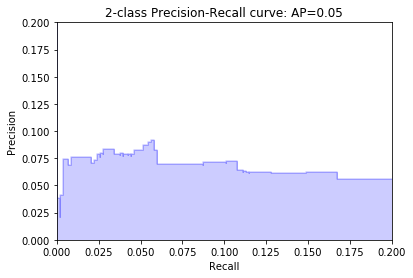

In [387]:
precision, recall, _ = metrics.precision_recall_curve(Y_test, ypred_test)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.2])
plt.xlim([0.0, 0.2])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(metrics.average_precision_score(Y_test, ypred_test)))



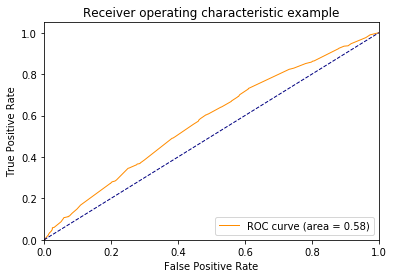

In [388]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test.ravel(), ypred_test.ravel())
roc_auc = metrics.auc(fpr, tpr)
plt.figure()

lw = 1
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [393]:
cd = pd.DataFrame(Y_test)
cd["ypred_test"] =  ypred_test
cd.sort_values(by = 'ypred_test', ascending = True)
cd.groupby(pd.qcut(cd['ypred_test'],10,duplicates='drop')).mean()
#cd.groupby(pd.qcut(cd['pred'],10,duplicates='drop')).sum()

,dv,ypred_test
ypred_test,,
"(0.4557, 0.4583]",0.026207,0.457033
"(0.4583, 0.4595]",0.030549,0.458715
"(0.4595, 0.46]",0.029486,0.459897
"(0.46, 0.4604]",0.046632,0.460352
"(0.4604, 0.4612]",0.040984,0.461024
"(0.4612, 0.4627]",0.045682,0.462123
"(0.4627, 0.4632]",0.049865,0.463093
"(0.4632, 0.4654]",0.046869,0.464802
"(0.4654, 0.4659]",0.063014,0.465691


In [394]:
cd["dv"].mean()

0.04132523311669963

In [395]:
0.061932/0.04132523311669963

1.4986485333333335

In [396]:
os.getcwd()

'C:\\Users\\shantanu.sharma\\Desktop\\HC'

In [399]:
metric_auc_test = metrics.roc_auc_score(Y_test, ypred_test)
gini_test = 2 * metric_auc_test - 1
gini_test

0.1536675427177232

In [400]:
bst

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65, gamma=0,
              learning_rate=0.015, max_delta_step=0, max_depth=1,
              min_child_weight=19, missing=nan, n_estimators=200, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=9, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [401]:
bst.best_ntree_limit

16

In [408]:
early_stopping_round=40
params1={'max_depth': 1,
 'learning_rate': 0.015,
 'subsample': 0.6,
 'min_child_weight': 19,
 'colsample_bytree': 0.65,
 'scale_pos_weight': 9,
 'objective': 'binary:logistic',
 'nthread': -1,
 'n_estimators': 16}
xgb_model = xgb.XGBClassifier(**params1)
selected_variables = ['top_device_family_count_per','days_since_first_dc_trans','top_device_os_amount','Insuf_fund_amount_360','amount_first_transaction','top_email_amount','top_merchant','total_amount_12to24_month','top_payment_mode_amount','days_on_pg','days_since_first_trans','distinct_email','Insuf_fund_count_360','top_device_family_amount']



bst = xgb_model.fit(X_train[selected_variables], np.ravel(Y_train), eval_metric="auc", eval_set=[(X_valid[selected_variables], np.ravel(Y_valid))],
                    early_stopping_rounds=early_stopping_round,  verbose=True)

auc_cv = cross_val_score(bst, X_train[selected_variables], Y_train, scoring='roc_auc', cv=kfolds.split(X_train[selected_variables], Y_train),
                         n_jobs=cpu)
gini_cv = (2 * np.array(auc_cv) - 1).mean()


if early_stopping_round is None:
    ypred_train = bst.predict_proba(X_train[selected_variables])[:, 1]
    ypred_test = bst.predict_proba(X_test[selected_variables])[:, 1]
    ypred_valid = bst.predict_proba(X_valid[selected_variables])[:, 1]

else:
    ypred_train = bst.predict_proba(X_train[selected_variables], ntree_limit=bst.best_ntree_limit)[:, 1]
    ypred_test = bst.predict_proba(X_test[selected_variables], ntree_limit=bst.best_ntree_limit)[:, 1]
    ypred_valid = bst.predict_proba(X_valid[selected_variables], ntree_limit=bst.best_ntree_limit)[:, 1]

    
metric_auc_train = metrics.roc_auc_score(Y_train, ypred_train)
metric_auc_test = metrics.roc_auc_score(Y_test, ypred_test)
metric_auc_valid = metrics.roc_auc_score(Y_valid, ypred_valid)


gini_train = 2 * metric_auc_train - 1
gini_valid = 2 * metric_auc_valid - 1
gini_test = 2 * metric_auc_test - 1


importance_tbl = fimportances(bst, X_train[selected_variables].columns)
importance_tbl.to_csv(os.getcwd()+"/varimpt_model_v2.csv",index=0)


print("GINI TRAIN:",gini_train )
print("GINI VALID:",gini_valid)
print("\nGINI TEST:",gini_test)
print("\nGINI CV:",gini_cv)

[0]	validation_0-auc:0.507942
Will train until validation_0-auc hasn't improved in 40 rounds.
[1]	validation_0-auc:0.547295
[2]	validation_0-auc:0.547836
[3]	validation_0-auc:0.550868
[4]	validation_0-auc:0.559562
[5]	validation_0-auc:0.560266
[6]	validation_0-auc:0.560689
[7]	validation_0-auc:0.561394
[8]	validation_0-auc:0.561282
[9]	validation_0-auc:0.560701
[10]	validation_0-auc:0.562216
[11]	validation_0-auc:0.562204
[12]	validation_0-auc:0.565499
[13]	validation_0-auc:0.567755
[14]	validation_0-auc:0.566891
[15]	validation_0-auc:0.569168
GINI TRAIN: 0.1309292003351652
GINI VALID: 0.13833599174300604

GINI TEST: 0.1555345202534062

GINI CV: 0.08493270472738328


In [403]:
params

{'max_depth': 1,
 'learning_rate': 0.015,
 'subsample': 0.6,
 'min_child_weight': 19,
 'colsample_bytree': 0.65,
 'scale_pos_weight': 9,
 'objective': 'binary:logistic',
 'nthread': -1,
 'n_estimators': 200}